In [37]:
#make sure you are in gis-env to run this code
#try to read in gis files
#import shapefile
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import Polygon


   OBJECTID_1  OBJECTID  LME_NUMBER        LME_NAME GROUPING ARCTIC USLMES  \
0           1         4         2.0  Gulf of Alaska     None   None    Yes   

   Shape_Leng    SUM_GIS_KM    Shape_Le_1    Shape_Area  \
0   495.47378  1.530668e+06  1.865007e+07  2.078917e+12   

                                            geometry  
0  (POLYGON ((6064202.546100002 3126461.8737, 606...  


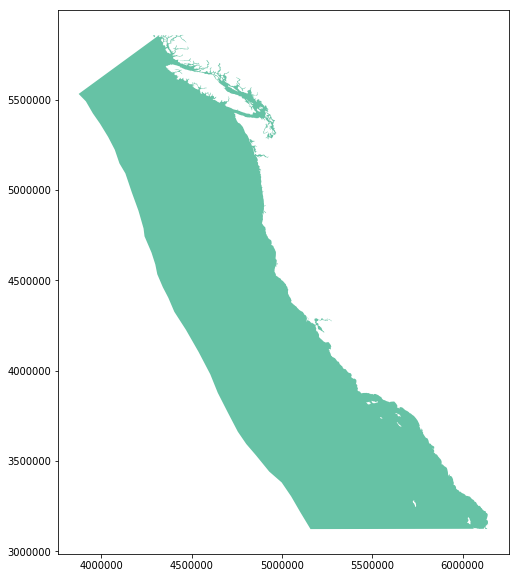

In [42]:
data_dir = 'F:/data/NASA_biophysical/pices_shapefiles/'
shp_file_base = 'PicesRegion11.shp'
df = gpd.read_file(data_dir+shp_file_base)
#shp_file_base = 'PicesRegion11.prj'
#df2 = gdp.read_file(data_dir+shp_file_base)
print(df.head())
#print(df2.head())
df.plot(cmap='Set2', figsize=(10, 10));

In [50]:
from pyproj import Proj
Proj('+init=epsg:2193', preserve_flags=True)

pyproj.Proj('+units=m +init=epsg:2193', preserve_units=True)

In [51]:
#my_geoseries.crs = {'init' :'epsg:4326'}
df2 = df.to_crs({'init': 'epsg:4326'}) #(epsg=4326)

RuntimeError: b'no arguments in initialization list'

In [47]:
df2

<bound method GeoDataFrame.to_crs of    OBJECTID_1  OBJECTID  LME_NUMBER        LME_NAME GROUPING ARCTIC USLMES  \
0           1         4         2.0  Gulf of Alaska     None   None    Yes   

   Shape_Leng    SUM_GIS_KM    Shape_Le_1    Shape_Area  \
0   495.47378  1.530668e+06  1.865007e+07  2.078917e+12   

                                            geometry  
0  (POLYGON ((6064202.546100002 3126461.8737, 606...  >

In [34]:
lat_point_list = [50.854457, 52.518172, 50.072651, 48.853033, 50.854457]
lon_point_list = [4.377184, 13.407759, 14.435935, 2.349553, 4.377184]
polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:4326'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       
print(polygon.geometry)

<module 'geopandas' from 'C:\\Users\\gentemann\\Miniconda3\\lib\\site-packages\\geopandas\\__init__.py'>

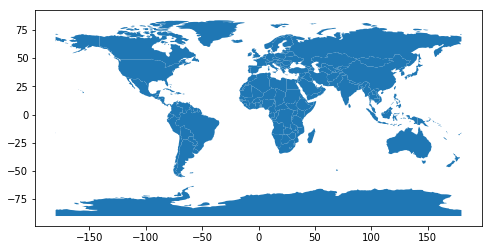

In [35]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)
world.plot(figsize=(8, 8));


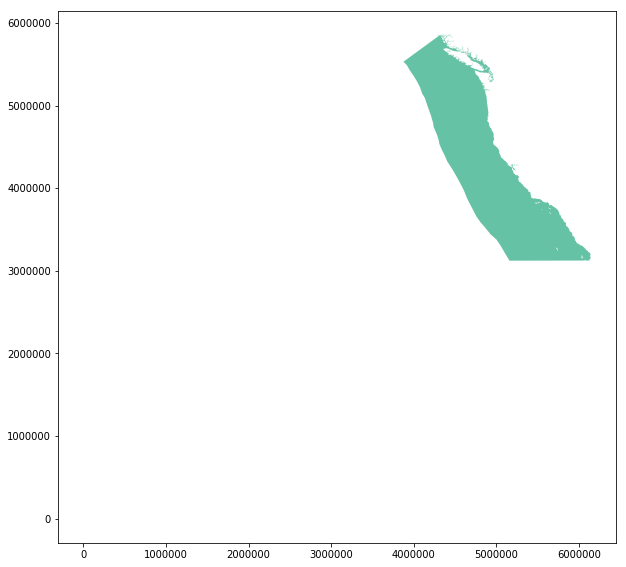

In [36]:
world.plot(ax=df.plot(cmap='Set2', figsize=(10, 10)), facecolor='gray');

number of shapes imported: 1


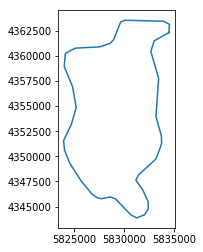

In [16]:
#old for esri type files.  doesn't work with vector data
sf = shapefile.Reader(data_dir+shp_file_base)
print('number of shapes imported:',len(sf.shapes()))
plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(sf.iterShapes()):
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
        plt.plot(x_lon,y_lat)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints

        seg=shape.points[i0:i1+1]
        x_lon = np.zeros((len(seg),1))
        y_lat = np.zeros((len(seg),1))
        for ip in range(len(seg)):
            x_lon[ip] = seg[ip][1]
            y_lat[ip] = seg[ip][0]

        plt.plot(x_lon,y_lat)

#plt.xlim(-130,-60)
#plt.ylim(23,50)
plt.show()




In [13]:
sf.shapeTypeName

'POLYGON'

In [14]:
len(sf)

1

In [15]:
sf.bbox

[3874276.854800001, 3122126.0632000007, 6140605.9855, 5857677.141100001]